<a href="https://colab.research.google.com/github/seungyihong/AI_ml/blob/master/titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드 및 데이터 확인


In [351]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/My Drive/타이타닉/train.csv')
df2 = pd.read_csv('/content/drive/My Drive/타이타닉/test.csv')

In [353]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [354]:
df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [355]:
df.shape

(891, 12)

In [356]:
df2.shape

(418, 11)

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 결측치 확인

In [358]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [359]:
df2.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 컬럼 삭제 및 결합 

In [0]:
mydata = df.drop(['Ticket','Cabin','Fare'], axis=1)
mydata_test = df2.drop(['Ticket','Cabin','Fare'], axis=1)

In [361]:
mydata.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,C


In [362]:
mydata['Family']= mydata['SibSp'] + mydata['Parch']
mydata_test['Family']= mydata_test['SibSp'] + mydata_test['Parch']
mydata.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,C,1


In [0]:
mydata = mydata.drop(['SibSp','Parch'], axis=1)
mydata_test = mydata_test.drop(['SibSp','Parch'], axis=1)

In [364]:
mydata.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,C,1


#  'Name' 컬럼 조사 

In [433]:
for data in mydata:
  data['NameTitle'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

TypeError: ignored

# 'sex' 컬럼 남자 - 0, 여자 - 1 로 설정

In [0]:
mydata['Sex'] = mydata['Sex'].apply(lambda x : 0 if x == 'male' else 1 )
mydata_test['Sex'] = mydata_test['Sex'].apply(lambda x : 0 if x == 'male' else 1 )

In [366]:
mydata.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,S,0
5,6,0,3,"Moran, Mr. James",0,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,C,1


In [367]:
mydata.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Embarked         2
Family           0
dtype: int64

# 'Embarked' NaN값 정보 확인

In [368]:
Embarked_null_index = mydata.index[mydata['Embarked'].isna()==True]
Embarked_null_index

Int64Index([61, 829], dtype='int64')

In [369]:
Embarked_null = mydata.iloc[Embarked_null_index,:]
Embarked_null

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Family
61,62,1,1,"Icard, Miss. Amelie",1,38.0,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,NaN,0


# 'Embarked' Nan값 처리
다른 feature 들과의 상관계수를 알아봄 

In [370]:
b= mydata[mydata['Survived'] == 1]['Survived'].sum()
b

342

In [371]:
o_Embarked_null = df.iloc[Embarked_null_index,:]
o_Embarked_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#상관관계를 알아보기 앞서 데이터 정리
# Embarked_to 함수 정의 및 적용
 C - 1 , Q - 2, S - 3

In [0]:
def Embarked_to(x):
  if x == 'C': return 1
  elif x == 'Q': return 2
  elif x == 'S': return 3
  else: return 1

In [0]:
r_df= df
r_df['Embarked'] = r_df['Embarked'].apply(Embarked_to)

In [374]:
r_df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,3
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,1


In [375]:
r_df.index

RangeIndex(start=0, stop=891, step=1)

# Cabin_to 함수 정의 
Nan 값 제외한 값에 대해
A - 1, B - 2, C - 3, D - 4, E - 5, F - 6, G - 7, T - 8

In [376]:
r0_df = df
r0_df.dropna(axis=0, subset=['Cabin'], inplace=True)
r0_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,3
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,3
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,3
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,3
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,3
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,3
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,3
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,1
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,1


In [377]:
li=[]
for i in r0_df.index:
  c = r0_df.loc[i,'Cabin']
  li.append(c[0])
s = set(li)
s

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [0]:
def Cabin_to(x):
  if x[0] == 'A': return 1
  elif x[0] == 'B': return 2 
  elif x[0] == 'C': return 3
  elif x[0] == 'D' : return 4
  elif x[0] == 'E' : return 5 
  elif x[0] == 'F' : return 6
  elif x[0] == 'G' : return 7
  elif x[0] == 'T' : return 8
  else: return x

In [0]:
r0_df= df
r0_df['Cabin'] = r0_df['Cabin'].apply(Cabin_to)

In [380]:
r0_df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,3
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,5,3
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,7,3
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,3,3
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,4,3
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,1,3
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,3,3
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,2,1
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,4,1


# 시각화 및 상관계수 값에 따른 'Pclass', 'Cabin', 'Embarked' 간의 상관관계 분석


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


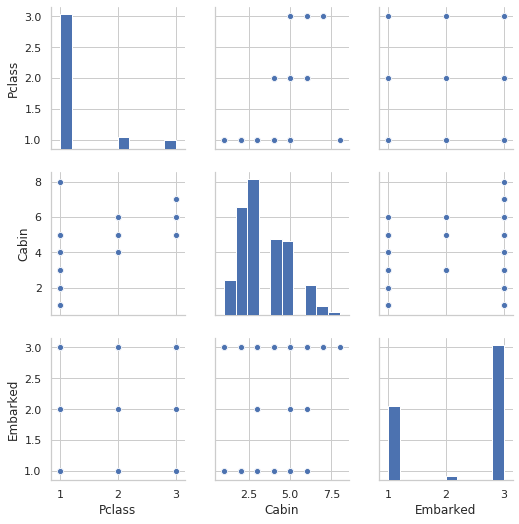

/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  

In [381]:
%matplotlib inline
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ['Pclass','Cabin','Embarked']
sns.pairplot(r0_df[cols],size=2.5)
plt.show()
sns.reset_orig()

In [382]:
r = np.corrcoef(r0_df[cols].values.T)
r

# Cabin 과 Pclass 간에 비교적 높은 상관관계가 존재
# Pclass - 1 일수록 Cabin 값이 A 석에 가까움 
# 우리가 처리하고자 하는 결측치 정보 Pclass - 1 , Cabin - B 일치
# Cabin 값이 B(2)일 경우 Embarked C(1) or S(3) 에 탑승했을 가능성이 높다고 판단 
# 결측치 값을 1 or 3으로 채우기로 결정 

array([[1.        , 0.59821088, 0.17364347],
       [0.59821088, 1.        , 0.26755863],
       [0.17364347, 0.26755863, 1.        ]])

# train 및 test 데이터 값 정리

In [383]:
mydata.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,S,0
5,6,0,3,"Moran, Mr. James",0,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,C,1


# 'Embarked' Nan 값 1또는 3으로 채우기

In [384]:
mydata.loc[Embarked_null_index,'Embarked'] = 1
mydata.loc[Embarked_null_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Family
61,62,1,1,"Icard, Miss. Amelie",1,38.0,1,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,1,0


In [0]:
mydata['Embarked'] = mydata['Embarked'].apply(Embarked_to)
mydata_test['Embarked'] = mydata_test['Embarked'].apply(Embarked_to)

In [386]:
mydata.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Embarked         0
Family           0
dtype: int64

In [387]:
mydata_test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
Embarked        0
Family          0
dtype: int64

In [388]:
mydata.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,3,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,3,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,3,0
5,6,0,3,"Moran, Mr. James",0,NaN,2,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,3,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,3,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,1


In [389]:
mydata_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,Embarked,Family
0,892,3,"Kelly, Mr. James",0,34.5,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,3,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,2,0
3,895,3,"Wirz, Mr. Albert",0,27.0,3,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,3,2
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,3,0
6,898,3,"Connolly, Miss. Kate",1,30.0,2,0
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,3,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,1,0
9,901,3,"Davies, Mr. John Samuel",0,21.0,3,2


# 'Age' 결측치 값 처리 

In [390]:
mydata['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [391]:
mydata_test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [0]:
mydata['Age']= np.rint(mydata['Age'].values)
mydata_test['Age']= np.rint(mydata_test['Age'].values)

In [393]:
mydata['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [394]:
mydata_test['Age']

0      34.0
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.0
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

# 'Age', 'Pclass', 'Survived', 'Family'간 상관관계 분석하기 

In [395]:
Age_null_index = mydata.index[mydata['Age'].isna()==True]
Age_null_index 

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [396]:
mydata.loc[5,'Age'] = np.nan
type(mydata.loc[5,'Age'])
mydata.loc[5,'Age']


nan

In [397]:
np.isnan(mydata.loc[5,'Age'])

True

In [398]:
type(Age_null_index)

pandas.core.indexes.numeric.Int64Index

In [399]:
Age2_null_index = mydata_test.index[mydata_test['Age'].isna()==True]
Age2_null_index 

Int64Index([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
             84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
            132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
            199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
            256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
            292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
            380, 382, 384, 408, 410, 413, 416, 417],
           dtype='int64')

In [0]:
r2_df = mydata
r2_df = r2_df.dropna(axis=0, subset=['Age'])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


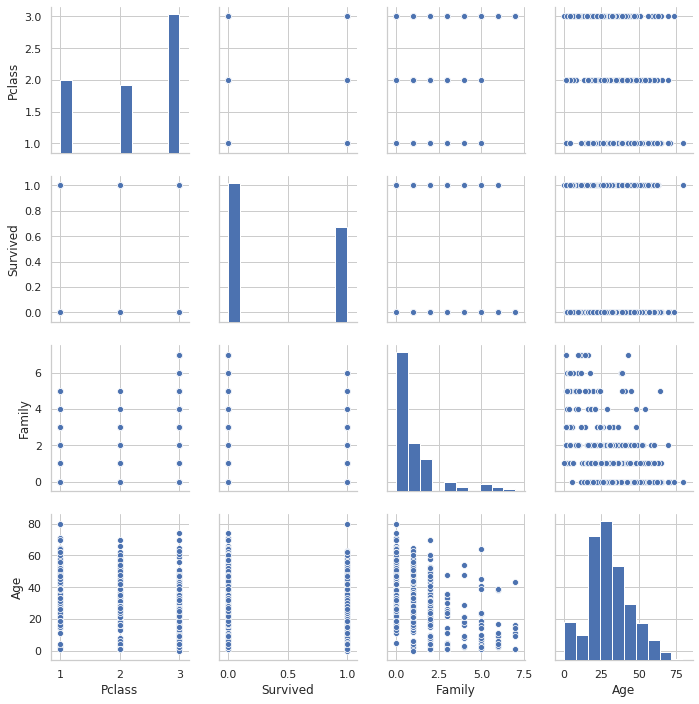

/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  

In [401]:
%matplotlib inline
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ['Pclass','Survived','Family','Age']
sns.pairplot(r2_df[cols],size=2.5)
plt.show()
sns.reset_orig()

In [402]:
r = np.corrcoef(r2_df[cols].values.T)
r

# Pclass - Survived : -0.338 class 가 높을수록 survived 1(생존)
# Pclass - Age_test : -0.33 class가 높을수록 age가 크다 
# Age_test - Family : -0.25 age가 높을수록 family가 적다 

array([[ 1.        , -0.35965268,  0.05690881, -0.36968078],
       [-0.35965268,  1.        ,  0.04278705, -0.07683395],
       [ 0.05690881,  0.04278705,  1.        , -0.30172086],
       [-0.36968078, -0.07683395, -0.30172086,  1.        ]])

In [0]:
mydata['Age_test'] = mydata['Age']

In [404]:
mydata['Age_test'].describe()

count    714.000000
mean      29.693277
std       14.524527
min        0.000000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age_test, dtype: float64

In [0]:
def Age_to(x):
  if x <= 5 : return 5
  elif x <= 10 : return 10
  elif x <= 15 : return 15
  elif x <= 20 : return 20
  elif x <= 25 : return 25
  elif x <= 30 : return 30
  elif x <= 35 : return 35
  elif x <= 40 : return 40
  elif x <= 45 : return 45
  elif x <= 50 : return 50
  elif x <= 55 : return 55
  elif x <= 60 : return 60
  elif x <= 70 : return 70
  elif x <= 80 : return 80
  else: return x

In [0]:
mydata['Age_test'] = mydata['Age_test'].apply(Age_to)

In [407]:
mydata['Age_test']

0      25.0
1      40.0
2      30.0
3      35.0
4      35.0
       ... 
886    30.0
887    20.0
888     NaN
889    30.0
890    35.0
Name: Age_test, Length: 891, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


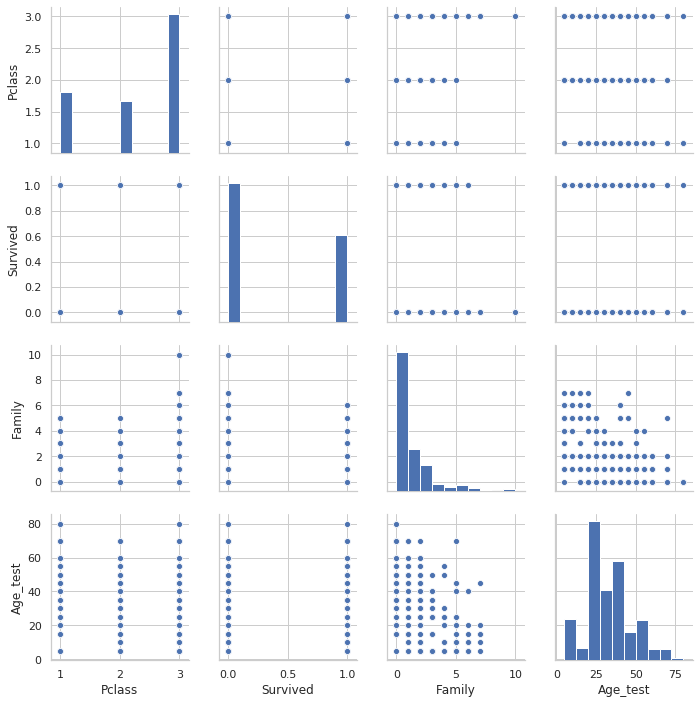

/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  

In [408]:
%matplotlib inline
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ['Pclass','Survived','Family','Age_test'] 
sns.pairplot(mydata[cols],size=2.5)
plt.show()
sns.reset_orig()

In [409]:
r = np.corrcoef(mydata[cols].values.T)
r

array([[ 1.        , -0.33848104,  0.06599691,         nan],
       [-0.33848104,  1.        ,  0.01663899,         nan],
       [ 0.06599691,  0.01663899,  1.        ,         nan],
       [        nan,         nan,         nan,         nan]])

In [0]:
mydata.drop(['Age_test'],inplace=True, axis=1)

In [411]:
mydata.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Embarked         0
Family           0
dtype: int64

In [412]:
mydata_test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
Embarked        0
Family          0
dtype: int64

In [413]:
mydata.loc[Age_null_index ,:].head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Family
5,6,0,3,"Moran, Mr. James",0,NaN,2,0
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,3,0
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,1,0
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,1,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,2,0
29,30,0,3,"Todoroff, Mr. Lalio",0,NaN,3,0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN,1,1
32,33,1,3,"Glynn, Miss. Mary Agatha",1,NaN,2,0
36,37,1,3,"Mamee, Mr. Hanna",0,NaN,1,0
42,43,0,3,"Kraeff, Mr. Theodor",0,NaN,1,0


In [414]:
mydata_test.loc[Age2_null_index ,:].head(50)

,PassengerId,Pclass,Name,Sex,Age,Embarked,Family
10,902,3,"Ilieff, Mr. Ylio",0,NaN,3,0
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",1,NaN,3,0
29,921,3,"Samaan, Mr. Elias",0,NaN,1,2
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",1,NaN,3,3
36,928,3,"Roth, Miss. Sarah A",1,NaN,3,0
39,931,3,"Hee, Mr. Ling",0,NaN,3,0
41,933,1,"Franklin, Mr. Thomas Parham",0,NaN,3,0
47,939,3,"Shaughnessy, Mr. Patrick",0,NaN,2,0
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",0,NaN,1,0
58,950,3,"Davison, Mr. Thomas Henry",0,NaN,3,1


In [0]:
mydata['Age'].fillna(mydata.groupby('Pclass')['Age'].transform('median'), inplace=True)
mydata_test['Age'].fillna(mydata_test.groupby('Pclass')['Age'].transform('median'), inplace=True)

In [416]:
mydata.loc[Age_null_index,'Age']

5      24.0
17     29.0
19     24.0
26     24.0
28     24.0
       ... 
859    24.0
863    24.0
868    24.0
878    24.0
888    24.0
Name: Age, Length: 177, dtype: float64

In [417]:
mydata.loc[Age_null_index,'Pclass']

5      3
17     2
19     3
26     3
28     3
      ..
859    3
863    3
868    3
878    3
888    3
Name: Pclass, Length: 177, dtype: int64

In [0]:
mydata['Age'] = np.array(mydata['Age'], dtype=np.int8)
mydata_test['Age'] = np.array(mydata_test['Age'], dtype=np.int8)

In [419]:
mydata['Age'].describe()

count    891.000000
mean      29.061728
std       13.242577
min        0.000000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [420]:
mydata_test['Age'].describe()

count    418.000000
mean      29.377990
std       12.991445
min        0.000000
25%       23.000000
50%       25.000000
75%       36.000000
max       76.000000
Name: Age, dtype: float64

In [421]:
mydata['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    24
889    26
890    32
Name: Age, Length: 891, dtype: int8

In [422]:
mydata_test['Age']

0      34
1      47
2      62
3      27
4      22
       ..
413    24
414    39
415    38
416    24
417    24
Name: Age, Length: 418, dtype: int8

In [423]:
mydata_test.head(30)

,PassengerId,Pclass,Name,Sex,Age,Embarked,Family
0,892,3,"Kelly, Mr. James",0,34,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,3,1
2,894,2,"Myles, Mr. Thomas Francis",0,62,2,0
3,895,3,"Wirz, Mr. Albert",0,27,3,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,3,2
5,897,3,"Svensson, Mr. Johan Cervin",0,14,3,0
6,898,3,"Connolly, Miss. Kate",1,30,2,0
7,899,2,"Caldwell, Mr. Albert Francis",0,26,3,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18,1,0
9,901,3,"Davies, Mr. John Samuel",0,21,3,2


## Model 적용 


In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [0]:
if __name__ == '__main__':
  X= mydata.drop('Survived',axis=1).values
  y = mydata['Survived'].values

In [428]:
print(X.shape, X.dtype)
print(y.shape, y.dtype)

(891, 7) object
(891,) int64


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [430]:
print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)
print(y_train.shape, y_train.dtype)
print(y_test.shape, y_test.dtype)

(623, 7) object
(268, 7) object
(623,) int64
(268,) int64


In [0]:
ml = RandomForestClassifier(n_estimators=100,max_features= 3, max_depth = 3,
                            min_samples_leaf= 30,
                            criterion='entropy',random_state=0, n_jobs=2)

In [432]:
ml.fit(X_train,y_train)
y_pred = ml.predict(mydata_test)
y_pred2 = ml.predict(X_test)
print('총 테스트 개수:%d 오류 개수 : %d' %(len(y_test), (y_test != y_pred2).sum()))
print('정확도 : %.2f' %accuracy_score(y_test, y_pred2))


ValueError: ignored

In [0]:
print(len(mydata_test))
print(len(mydata))
print(len(y_pred))

In [0]:
SAVE_FILE_NAME ='J'
submission = pd.DataFrame({
        "PassengerId": mydata_test["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv(SAVE_FILE_NAME+'titanic_SUBMISSION.csv', index=False)